In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, roc_auc_score
import shap

In [2]:
#import variables from model1
with open("variables_model1.pkl", "rb") as file:
    variables_model1 = pickle.load(file)

y_train_1 = variables_model1['y_train_1']
y_test_1 = variables_model1['y_test_1'] 
X_train_selected_1 = variables_model1['X_train_selected_1']
X_test_selected_1 = variables_model1['X_test_selected_1']
X_train_selected_scaled_1 = variables_model1['X_train_selected_scaled_1']
X_test_selected_scaled_1 = variables_model1['X_test_selected_scaled_1']
y_pred_rf_1 = variables_model1['y_pred_rf_1']
y_pred_lr_1 = variables_model1['y_pred_lr_1']
y_pred_svm_1 = variables_model1['y_pred_svm_1']
y_pred_probs_rf_1 = variables_model1['y_pred_probs_rf_1']
y_pred_probs_lr_1 = variables_model1['y_pred_probs_lr_1']
y_pred_probs_svm_1 = variables_model1['y_pred_probs_svm_1']
fpr_rf_1 = variables_model1['fpr_rf_1']
fpr_lr_1 = variables_model1['fpr_lr_1']
fpr_svm_1 = variables_model1['fpr_svm_1']
tpr_rf_1 = variables_model1['tpr_rf_1']
tpr_lr_1 = variables_model1['tpr_lr_1']
tpr_svm_1 = variables_model1['tpr_svm_1']
threshold_rf_1 = variables_model1['threshold_rf_1']
threshold_lr_1= variables_model1['threshold_lr_1']
threshold_svm_1 = variables_model1['threshold_svm_1']
explainer_rf_1 = variables_model1['explainer_rf_1']
explainer_lr_1 = variables_model1['explainer_lr_1']
explainer_svm_1 = variables_model1['explainer_svm_1']
shap_values_rf_1 = variables_model1['shap_values_rf_1']
shap_values_lr_1 = variables_model1['shap_values_lr_1']
shap_values_svm_1 = variables_model1['shap_values_svm_1']

In [3]:
#import variables from model2
with open("variables_model2.pkl", "rb") as file:
    variables_model2 = pickle.load(file)
    y_train_1 = variables_model1['y_train_1']
    
y_test_2 = variables_model2['y_test_2'] 
X_train_selected_2 = variables_model2['X_train_selected_2']
X_test_selected_2 = variables_model2['X_test_selected_2']
X_train_selected_scaled_2 = variables_model2['X_train_selected_scaled_2']
X_test_selected_scaled_2 = variables_model2['X_test_selected_scaled_2']
y_pred_rf_2 = variables_model2['y_pred_rf_2']
y_pred_lr_2 = variables_model2['y_pred_lr_2']
y_pred_svm_2 = variables_model2['y_pred_svm_2']
y_pred_probs_rf_2 = variables_model2['y_pred_probs_rf_2']
y_pred_probs_lr_2 = variables_model2['y_pred_probs_lr_2']
y_pred_probs_svm_2 = variables_model2['y_pred_probs_svm_2']
fpr_rf_2 = variables_model2['fpr_rf_2']
fpr_lr_2 = variables_model2['fpr_lr_2']
fpr_svm_2 = variables_model2['fpr_svm_2']
tpr_rf_2 = variables_model2['tpr_rf_2']
tpr_lr_2 = variables_model2['tpr_lr_2']
tpr_svm_2 = variables_model2['tpr_svm_2']
threshold_rf_2 = variables_model2['threshold_rf_2']
threshold_lr_2 = variables_model2['threshold_lr_2']
threshold_svm_2 = variables_model2['threshold_svm_2']
explainer_rf_2 = variables_model2['explainer_rf_2']
explainer_lr_2 = variables_model2['explainer_lr_2']
explainer_svm_2 = variables_model2['explainer_svm_2']
shap_values_rf_2 = variables_model2['shap_values_rf_2']
shap_values_lr_2 = variables_model2['shap_values_lr_2']
shap_values_svm_2 = variables_model2['shap_values_svm_2']

In [4]:
accuracy_rf_clinical, recall_rf_clinical, precision_rf_clinical, f_score_rf_clinical = 0.65, 0.55, 0.67, 0.60,
accuracy_svm_clinical, recall_svm_clinical, precision_svm_clinical, f_score_svm_clinical = 0.65, 0.55, 0.67, 0.60,
accuracy_lr_clinical, recall_lr_clinical, precision_lr_clinical, f_score_lr_clinical = 0.57, 0.45, 0.56, 0.50,

accuracy_rf_neuroimaging, recall_rf_neuroimaging, precision_rf_neuroimaging, f_score_rf_neuroimaging = 0.42, 0.22, 0.33, 0.27,
accuracy_svm_neuroimaging, recall_svm_neuroimaging, precision_svm_neuroimaging, f_score_svm_neuroimaging = 0.53, 0.78, 0.50, 0.61,
accuracy_lr_neuroimaging, recall_lr_neuroimaging, precision_lr_neuroimaging, f_score_lr_neuroimaging = 0.47, 0.33, 0.43, 0.38


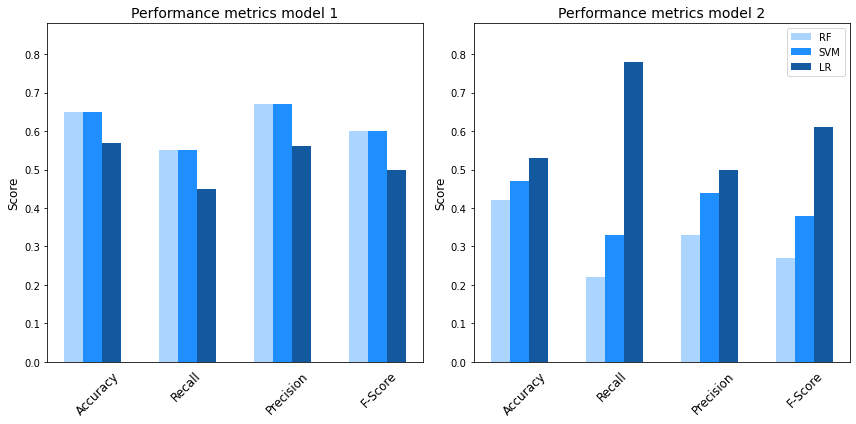

In [5]:
#make plots for performance metrics

# Data for clinical results
accuracy_clinical = [0.65, 0.65, 0.57]
recall_clinical = [0.55, 0.55, 0.45]
precision_clinical = [0.67, 0.67, 0.56]
f_score_clinical = [0.60, 0.60, 0.50]

# Data for neuroimaging results
accuracy_neuroimaging = [0.42, 0.47, 0.53]
recall_neuroimaging = [0.22, 0.33, 0.78]
precision_neuroimaging = [0.33, 0.44, 0.50]
f_score_neuroimaging = [0.27, 0.38, 0.61]

classifiers = ['RF', 'SVM', 'LR']
metrics = ['Accuracy', 'Recall', 'Precision', 'F-Score']
colors = ['#ABD5FF', '#1F8FFF', '#13599F']

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for clinical results
axs[0].set_title('Performance metrics model 1', fontsize=14)
axs[0].set_xticks(np.arange(len(metrics)))
axs[0].set_xticklabels(metrics, rotation=45, ha='left', fontsize=12)
axs[0].set_ylabel('Score', fontsize=12)
axs[0].tick_params(axis='x', bottom=False)

# Plot for neuroimaging results
axs[1].set_title('Performance metrics model 2', fontsize=14)
axs[1].set_xticks(np.arange(len(metrics)))
axs[1].set_xticklabels(metrics, rotation=45, ha='left', fontsize=12)
axs[1].set_ylabel('Score', fontsize=12)
axs[1].tick_params(axis='x', bottom=False)

# Plot bars for each classifier and metric in clinical results
for i, classifier in enumerate(classifiers):
    axs[0].bar(np.arange(len(metrics)) + (i * 0.2), [accuracy_clinical[i], recall_clinical[i], precision_clinical[i], f_score_clinical[i]], width=0.2, label=classifier, color=colors[i])

# Plot bars for each classifier and metric in neuroimaging results
for i, classifier in enumerate(classifiers):
    axs[1].bar(np.arange(len(metrics)) + (i * 0.2), [accuracy_neuroimaging[i], recall_neuroimaging[i], precision_neuroimaging[i], f_score_neuroimaging[i]], width=0.2, label=classifier, color=colors[i])

# Set legend for both plots
axs[1].legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Set a common y-axis limit for both subplots
max_score = max(max(accuracy_clinical), max(recall_clinical), max(precision_clinical), max(f_score_clinical),
                max(accuracy_neuroimaging), max(recall_neuroimaging), max(precision_neuroimaging), max(f_score_neuroimaging))
axs[0].set_ylim([0, max_score + 0.1])  # Adjust the padding if needed
axs[1].set_ylim([0, max_score + 0.1])  # Adjust the padding

#remove gridlines
axs[0].grid(False)
axs[1].grid(False)

# Save the figure as a PNG file
plt.savefig('figure1.png', dpi=300, bbox_inches='tight')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

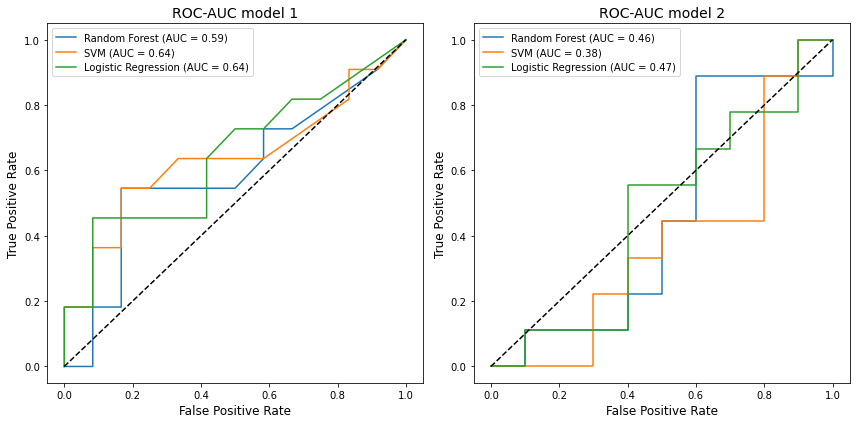

In [6]:
#make plots for roc_auc
# Calculate AUC scores
auc_rf_1 = roc_auc_score(y_test_1, y_pred_probs_rf_1)
auc_svm_1 = roc_auc_score(y_test_1, y_pred_probs_svm_1)
auc_lr_1 = roc_auc_score(y_test_1, y_pred_probs_lr_1)

auc_rf_2 = roc_auc_score(y_test_2, y_pred_probs_rf_2)
auc_svm_2 = roc_auc_score(y_test_2, y_pred_probs_svm_2)
auc_lr_2 = roc_auc_score(y_test_2, y_pred_probs_lr_2)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Feature Set 1
ax1.plot(fpr_rf_1, tpr_rf_1, label=f'Random Forest (AUC = {auc_rf_1:.2f})')
ax1.plot(fpr_svm_1, tpr_svm_1, label=f'SVM (AUC = {auc_svm_1:.2f})')
ax1.plot(fpr_lr_1, tpr_lr_1, label=f'Logistic Regression (AUC = {auc_lr_1:.2f})')

# Add a diagonal black line
ax1.plot([0, 1], [0, 1], color='black', linestyle='--')

ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC-AUC model 1', fontsize=14)
ax1.legend(fontsize=10)

# Subplot 2: Feature Set 2
ax2.plot(fpr_rf_2, tpr_rf_2, label=f'Random Forest (AUC = {auc_rf_2:.2f})')
ax2.plot(fpr_svm_2, tpr_svm_2, label=f'SVM (AUC = {auc_svm_2:.2f})')
ax2.plot(fpr_lr_2, tpr_lr_2, label=f'Logistic Regression (AUC = {auc_lr_2:.2f})')

# Add a diagonal black line
ax2.plot([0, 1], [0, 1], color='black', linestyle='--')

ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC-AUC model 2', fontsize=14)
ax2.legend(fontsize=10)

# Save the figure as a PNG file
plt.savefig('figure2.png', dpi=300, bbox_inches='tight')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Values: [0.01052299936988028, 0.06471329552615002, 0.08563327032136105, 0.08777567737870193, 0.1706994328922495, 0.1727788279773157]


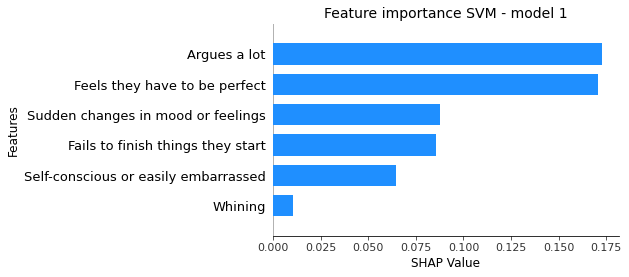

In [7]:
feature_names_1 = ['Whining', 'Self-conscious or easily embarrassed', 'Fails to finish things they start', 'Sudden changes in mood or feelings', 'Feels they have to be perfect', 'Argues a lot']

# Create the summary plot
shap.summary_plot(shap_values_svm_1, X_test_selected_1, plot_type='bar', show=False)

# Set plot properties
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature importance SVM - model 1', fontsize=14)

# Adjust spacing between bars
plt.subplots_adjust(left=0.3)

# Set the y-axis tick labels as the feature names
plt.yticks(ticks=range(len(feature_names_1)), labels=feature_names_1)

for patch in plt.gca().patches:
    patch.set_facecolor('#1F8FFF')
    
# Set the color of tick labels to black
for tick_label in plt.gca().get_yticklabels():
    tick_label.set_color('black')
    
    # Get the patches from the plot
patches = plt.gca().patches

# Extract the values from the patches
values = [patch.get_width() for patch in patches]

# Print the extracted values
print("Values:", values)
    
# Save the figure as a PNG file
plt.savefig('figure3.png', dpi=300, bbox_inches='tight')


plt.show()

Values: [0.038537132304445325, 0.06271600052763487, 0.07099986809128082, 0.11427911884975592, 0.11606648199445979, 0.11753726421316447, 0.11806489908982983, 0.14442685661522225]


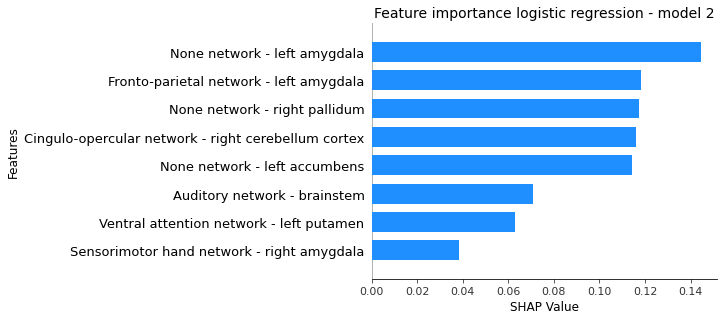

In [8]:
feature_names_2 = ['Sensorimotor hand network - right amygdala', 'Ventral attention network - left putamen', 'Auditory network - brainstem', 'None network - left accumbens', 'Cingulo-opercular network - right cerebellum cortex', 'None network - right pallidum', 'Fronto-parietal network - left amygdala', 'None network - left amygdala']

# Create the summary plot
shap.summary_plot(shap_values_lr_2, X_test_selected_2, plot_type='bar', show=False)

# Set plot properties
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature importance logistic regression - model 2', fontsize=14)

# Adjust spacing between bars
plt.subplots_adjust(left=0.3)

# Set the y-axis tick labels as the feature names
plt.yticks(ticks=range(len(feature_names_2)), labels=feature_names_2)

for patch in plt.gca().patches:
    patch.set_facecolor('#1F8FFF')
        
# Set the color of tick labels to black
for tick_label in plt.gca().get_yticklabels():
    tick_label.set_color('black')
    
        # Get the patches from the plot
patches = plt.gca().patches

# Extract the values from the patches
values = [patch.get_width() for patch in patches]

# Print the extracted values
print("Values:", values)
    
# Save the figure as a PNG file
plt.savefig('figure4.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

AttributeError: 'ellipsis' object has no attribute 'values'